In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
N, D = 800, 28*28
with open('a012_images.dat', 'rb') as fid:
    X = np.fromfile(fid, np.uint8).reshape(N, D)

In [15]:
def plot_digit(X):
    plt.imshow(X.reshape(28, 28).T, cmap=plt.cm.Greys)
    plt.show()

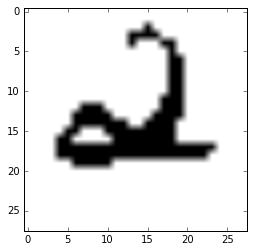

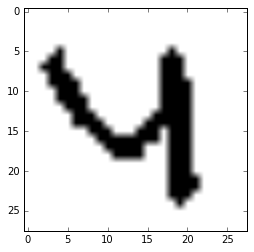

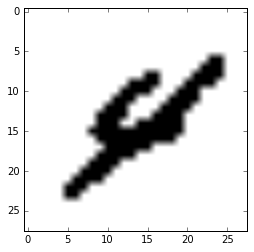

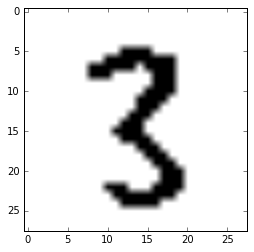

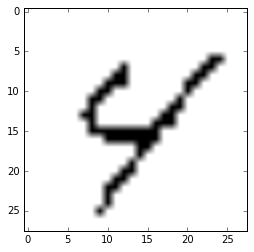

In [19]:
for i in np.random.choice(N, size=5):
    plot_digit(X[i])

In [46]:
from numpy.core.umath_tests import matrix_multiply as mm

def EM(X, K=4, max_iter=100, tol=0.01):
    # Initialize variables
    N, D = X.shape
    pis = np.ones(K) / K
    mus = np.random.uniform(0.25, 0.75, size=(K, D))
    
    prev_llh = 0
    for i in range(max_iter):
        # E step
        resps = np.zeros((K, N)) # responsibilities
        for k in range(K):
            resps[k] = pis[k] * np.prod(mus[k]**X * (1-mus[k])**(1-X), axis=1)
        resps /= resps.sum(axis=0)
        
        # M step
        Nks = resps.sum(axis=1)[:, np.newaxis]
        mus = np.dot(resps, X) / Nks # Calculate new mus
        pis = Nks / N
        
        # Evaluate log likelihood
        llh = 0
        for k in range(K):
            llh += pis[k] * np.prod(mus[k]**X * (1-mus[k])**(1-X), axis=1)
        llh = np.log(llh).sum()
        print('Iteration: %d, likelihood %.4f' % (i, llh))
        
        # Plot the means
        _, axs = plt.subplots(1, K)
        for mu, ax in zip(mus, axs):
            ax.imshow(mu.reshape(28, 28).T, cmap=plt.cm.Greys, vmin=0, vmax=1)
        
        if np.abs(llh - prev_llh) < tol:
            # Break if the log-likelihood hasn't improved much
            plt.savefig('means.png', bbox_inches='tight', dpi=300)
            break
        prev_llh = llh
        plt.show()
    
    return pis, mus

Iteration: 0, likelihood -155086.6763


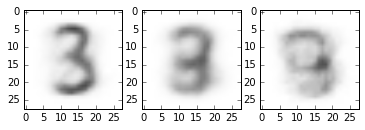

Iteration: 1, likelihood -148009.0912


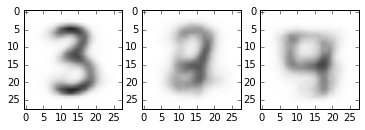

Iteration: 2, likelihood -145949.3941


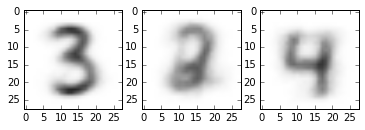

Iteration: 3, likelihood -144804.5951


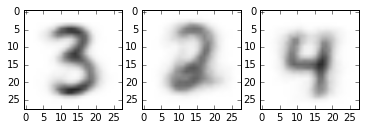

Iteration: 4, likelihood -144340.8285


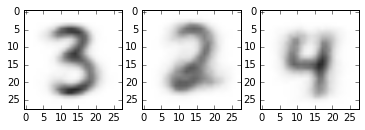

Iteration: 5, likelihood -144129.8061


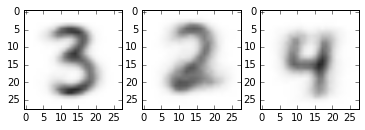

Iteration: 6, likelihood -144087.8576


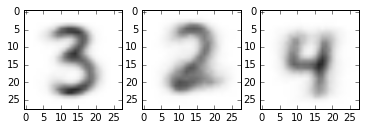

Iteration: 7, likelihood -144078.0926


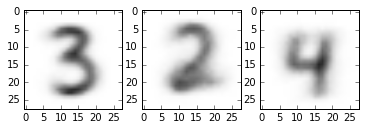

Iteration: 8, likelihood -144051.6615


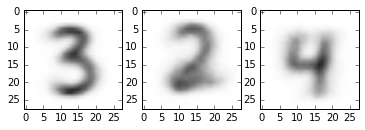

Iteration: 9, likelihood -144048.4911


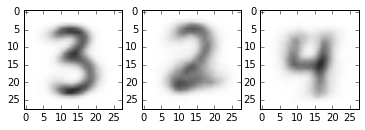

Iteration: 10, likelihood -144048.2482


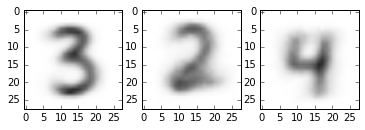

Iteration: 11, likelihood -144035.3920


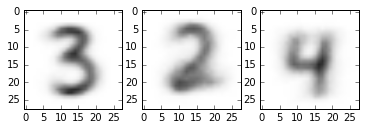

Iteration: 12, likelihood -144029.4398


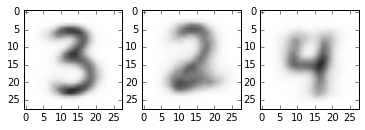

Iteration: 13, likelihood -144029.4026


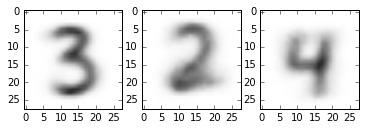

Iteration: 14, likelihood -144028.1130


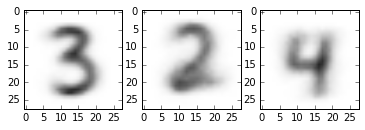

Iteration: 15, likelihood -144022.3604


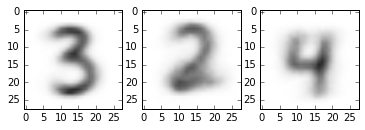

Iteration: 16, likelihood -144021.9972


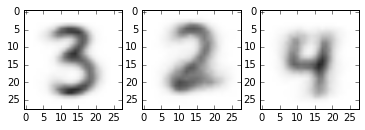

Iteration: 17, likelihood -144021.9920


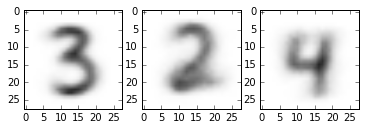

Iteration: 18, likelihood -144021.9916


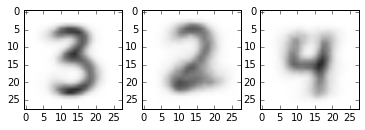

Iteration: 19, likelihood -144021.9915


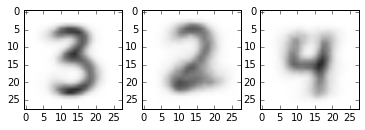

Iteration: 20, likelihood -144021.9915


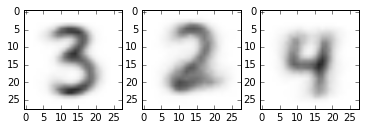

Iteration: 21, likelihood -144021.9915


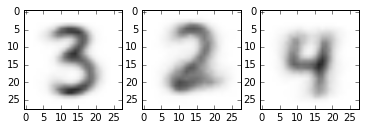

Iteration: 22, likelihood -144021.9915


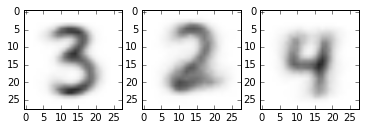

Iteration: 23, likelihood -144021.9915


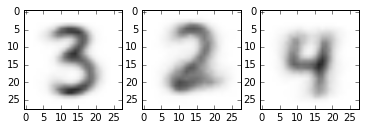

Iteration: 24, likelihood -144021.9914


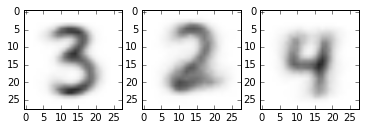

Iteration: 25, likelihood -144021.9914


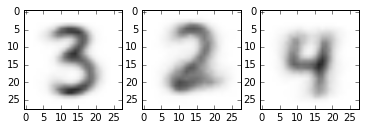

Iteration: 26, likelihood -144021.9914


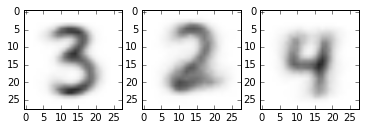

Iteration: 27, likelihood -144021.9864


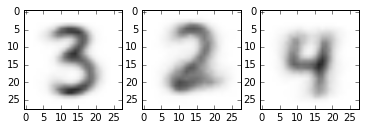

Iteration: 28, likelihood -144021.4239


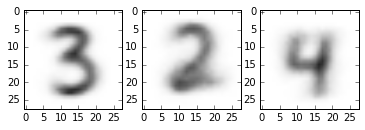

Iteration: 29, likelihood -144007.7527


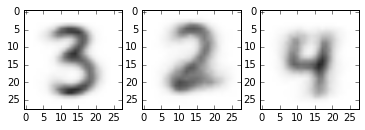

Iteration: 30, likelihood -143998.0675


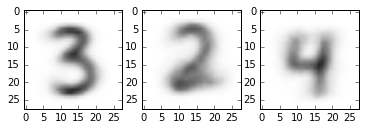

Iteration: 31, likelihood -143998.0501


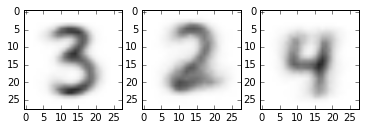

Iteration: 32, likelihood -143998.0348


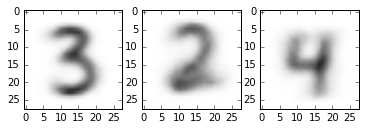

Iteration: 33, likelihood -143998.0195


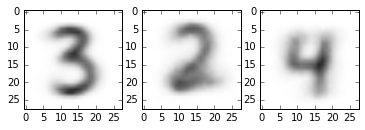

Iteration: 34, likelihood -143998.0044


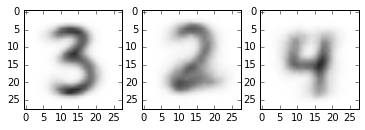

Iteration: 35, likelihood -143997.9904


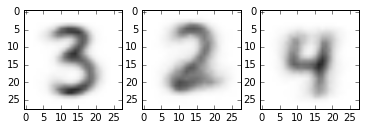

Iteration: 36, likelihood -143997.9786


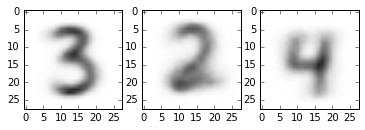

Iteration: 37, likelihood -143997.9700


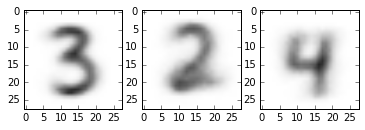

Iteration: 38, likelihood -143997.9646


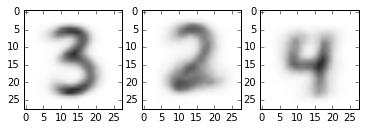

Iteration: 39, likelihood -143997.9615


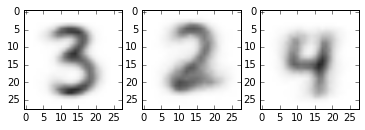

(array([[ 0.36124481],
        [ 0.31844331],
        [ 0.32031188]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

In [48]:
EM(X, K=3, max_iter=40, tol=1e-8)

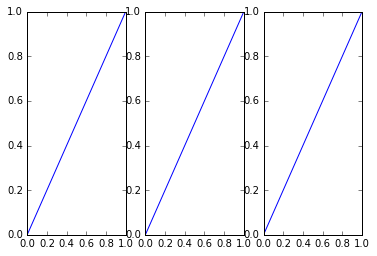